In [1]:
import time
from tabulate import tabulate
import random 
import matplotlib.pyplot as plt

In [2]:
class BinaryNumber:
    """ done """
    def __init__(self, n):
        self.decimal_val = n
        #binary representation of the input number                
        self.binary_vec = list('{0:b}'.format(n)) 
        
    def __repr__(self):
        return('decimal=%d binary=%s' % (self.decimal_val, ''.join(self.binary_vec)))

# some useful utility functions to manipulate bit vectors
def binary2int(binary_vec): 
    '''list of bits back to an integer'''
    if len(binary_vec) == 0:
        return BinaryNumber(0)
    
    return BinaryNumber(int(''.join(binary_vec), 2))

def split_number(vec):
    '''splitter that will chop our array in half'''
    return (binary2int(vec[:len(vec)//2]),
            binary2int(vec[len(vec)//2:]))

def bit_shift(number, n):
    '''shifts an input left by n bits - essentially appends n 0 bits to the end of the bit array
       this makes the value much larger - essentially squaring it'''
    return binary2int(number.binary_vec + ['0'] * n)
    
def pad(x,y):

    # pad with leading 0 if x/y have different number of bits
    #leading 0s have no effect on the value, and enable no interference length manipulation
    if len(x) < len(y):
        x = ['0'] * (len(y)-len(x)) + x


    elif len(y) < len(x):
        y = ['0'] * (len(x)-len(y)) + y

    # pad with leading 0 if not even number of bits
    #you want it to be even so the split is equivalent on both sides 
    #this is neccesary for the operation to work
    if len(x) % 2 != 0:
        x = ['0'] + x
        y = ['0'] + y

    return x,y

#### samples that use the provided functionality and display the binary

In [3]:
def quadratic_multiply(x, y):
    #base case: one of them is a single bit - return to break recursion 
    if len(x.binary_vec) == 1 or len(y.binary_vec) == 1:
        return list(bin(x.decimal_val * y.decimal_val)[2:])
    
    #we need to continue recursion
    else:
        #we need to continue recursion, pad to get an even length before we split them
        x_array, y_array = pad(x.binary_vec, y.binary_vec)

        #split these into 4-quadrants and multiply all combinations 
        #this is where the quadratic runtime comes from - have to do 4 per iteration
        x_left, x_right = split_number(x_array)
        y_left, y_right = split_number(y_array)
    
        #left half of x and y
        product1 = binary2int(quadratic_multiply(x_left, y_left))
    
        #right half of x and y
        product2 = binary2int(quadratic_multiply(x_right, y_right))
    
        #left half of x and right half of y
        product3 = binary2int(quadratic_multiply(x_left, y_right))
    
        #right half of x and left half of y
        product4 = binary2int(quadratic_multiply(x_right, y_left))

        n = len(x_array)

        #(xL ​yL​) ⋅ 2n + (xL ​yR ​+ xR ​yL​) ⋅ 2n/2 + (xR ​yR​)
        result = (
        bit_shift(product1, n).decimal_val + product2.decimal_val +
        bit_shift(BinaryNumber(product3.decimal_val + product4.decimal_val), n // 2).decimal_val
        )
        
    return list(bin(result)[2:])

print(binary2int(quadratic_multiply(BinaryNumber(2), BinaryNumber(2))))
print(binary2int(quadratic_multiply(BinaryNumber(3), BinaryNumber(7))))

decimal=4 binary=100
decimal=21 binary=10101


In [4]:
def subquadratic_multiply(x, y):
    #base case: one of them is a single bit - return to break recursion 
    if len(x.binary_vec) == 1 or len(y.binary_vec) == 1:
        return list(bin(x.decimal_val * y.decimal_val)[2:])
    
    #we need to continue recursion
    else:
        #pad to get an even length before we split them again
        x_array, y_array = pad(x.binary_vec, y.binary_vec)

        #split these into 4-quadrants and multiply all combinations 
        #this is where the quadratic runtime comes from - have to do 4 per iteration
        x_left, x_right = split_number(x_array)
        y_left, y_right = split_number(y_array)
    
        #left half of x and y
        product1 = binary2int(subquadratic_multiply(x_left, y_left))
    
        #right half of x and y
        product2 = binary2int(subquadratic_multiply(x_right, y_right))

        #Karatsuba's trick of instead adding these together
        #this makes 3 operations instead of 4, hence subquadratic
        product3 = binary2int(subquadratic_multiply(
        BinaryNumber(x_left.decimal_val + x_right.decimal_val),
        BinaryNumber(y_left.decimal_val + y_right.decimal_val)
        ))

        n = len(x_array)

        #p1 * 2^n + (p3 - p1 - p2) * 2^(n/2) + p2
        result = (bit_shift(product1, n).decimal_val + product2.decimal_val +
        bit_shift( BinaryNumber(product3.decimal_val - product1.decimal_val - product2.decimal_val), n // 2).decimal_val
        )
        
    return list(bin(result)[2:])

print(binary2int(subquadratic_multiply(BinaryNumber(2), BinaryNumber(2))))
print(binary2int(subquadratic_multiply(BinaryNumber(3), BinaryNumber(7))))

decimal=4 binary=100
decimal=21 binary=10101


#### examples to go into the python file with assertions - had to make some changes, hope you don't mind

In [5]:
def quadratic_multiply(x, y):
    #base case: one of them is a single bit - return to break recursion 
    if len(x.binary_vec) == 1 or len(y.binary_vec) == 1:
        return x.decimal_val * y.decimal_val
    
    #we need to continue recursion
    else:

        #we need to continue recursion, pad to get an even length before we split them
        x_array, y_array = pad(x.binary_vec, y.binary_vec)

        #split these into 4-quadrants and multiply all combinations 
        #this is where the quadratic runtime comes from - have to do 4 per iteration
        x_left, x_right = split_number(x_array)
        y_left, y_right = split_number(y_array)

        n = len(x_array)
    
        #left half of x and y
        product1 = quadratic_multiply(x_left, y_left)
        p1 = bit_shift(BinaryNumber(product1), n) 
    
        #right half of x and y
        product2 = quadratic_multiply(x_right, y_right)
        p2 = BinaryNumber(product2)   
    
        #left half of x and right half of y
        product3 = quadratic_multiply(x_left, y_right)
        
        #right half of x and left half of y
        product4 = quadratic_multiply(x_right, y_left)

        cross = BinaryNumber(product3 + product4)
        p3 = bit_shift(cross, n // 2)

        #(xL ​yL​) ⋅ 2n + (xL ​yR ​+ xR ​yL​) ⋅ 2n/2 + (xR ​yR​)
        return p1.decimal_val + p2.decimal_val + p3.decimal_val
    
print(quadratic_multiply(BinaryNumber(2), BinaryNumber(2)))

4


In [6]:
def subquadratic_multiply(x, y):
    #base case: one of them is a single bit - return to break recursion 
    if len(x.binary_vec) == 1 or len(y.binary_vec) == 1:
        return x.decimal_val * y.decimal_val
    
    #we need to continue recursion
    else:
        #pad to get an even length before we split them again
        x_array, y_array = pad(x.binary_vec, y.binary_vec)

        #split these into 4-quadrants and multiply all combinations 
        #this is where the quadratic runtime comes from - have to do 4 per iteration
        x_left, x_right = split_number(x_array)
        y_left, y_right = split_number(y_array)

        n = len(x_array)
    
        #left half of x and y
        product1 = subquadratic_multiply(x_left, y_left)
        p1 = bit_shift(BinaryNumber(product1), n) 
    
        #right half of x and y
        product2 = subquadratic_multiply(x_right, y_right)
        p2 = BinaryNumber(product2)  

        #Karatsuba's trick of instead adding these together
        #this makes 3 operations instead of 4, hence subquadratic
        product3 = subquadratic_multiply(
        BinaryNumber(x_left.decimal_val + x_right.decimal_val),
        BinaryNumber(y_left.decimal_val + y_right.decimal_val)
        )

        cross = product3 - product1 - product2
        p3 = bit_shift(BinaryNumber(cross), n // 2) 

    return p1.decimal_val + p2.decimal_val + p3.decimal_val

In [7]:
# some timing functions here that will make comparisons easy    
def time_multiply(x, y, f):
    start = time.time()
    # multiply two numbers x, y using function f
    f(x,y)
    return (time.time() - start)*1000

def compare_multiply():
    res = []
    qtimes = []
    subqtimes = []
    sizes = [10,100,1000,10000,100000,1000000,10000000,100000000,1000000000]
    for n in [10,100,1000,10000,100000,1000000,10000000,100000000,1000000000]:
        qtime = time_multiply(BinaryNumber(n), BinaryNumber(n), quadratic_multiply)
        qtimes.append(qtime)

        subqtime = time_multiply(BinaryNumber(n), BinaryNumber(n), subquadratic_multiply) 
        subqtimes.append(subqtime)

        res.append((n, qtime, subqtime))

    avg_qtime = sum(qtimes)
    avg_subqtime = sum(subqtimes)

    if avg_subqtime < avg_qtime:
        print(f"sub q times are on average : {round(avg_subqtime / avg_qtime) * 100}% faster")
    
    else:
        print(f"q times are on average : {round(avg_qtime / avg_subqtime) * 100}% faster")

    print_results(res)

def print_results(results):
    print("\n")
    print(
        tabulate(
            results,
            headers=['n', 'quadratic', 'subquadratic'],
            floatfmt=".3f",
            tablefmt="github"))

In [8]:
n = 1000000
runtime = time_multiply(BinaryNumber(n), BinaryNumber(n), quadratic_multiply)
print(f"quadratic_multiply({n}, {n}) took {runtime:.3f} ms")

n = 1000000
runtime = time_multiply(BinaryNumber(n), BinaryNumber(n), subquadratic_multiply)
print(f"subquadratic_multiply({n}, {n}) took {runtime:.3f} ms")

quadratic_multiply(1000000, 1000000) took 0.339 ms
subquadratic_multiply(1000000, 1000000) took 0.380 ms


In [9]:
compare_multiply()

q times are on average : 100% faster


|          n |   quadratic |   subquadratic |
|------------|-------------|----------------|
|         10 |       0.044 |          0.029 |
|        100 |       0.039 |          0.062 |
|       1000 |       0.076 |          0.154 |
|      10000 |       0.077 |          0.171 |
|     100000 |       0.152 |          0.220 |
|    1000000 |       0.239 |          0.267 |
|   10000000 |       0.192 |          0.289 |
|  100000000 |       0.323 |          0.462 |
| 1000000000 |       0.259 |          0.428 |


#### Did a little google because this result confused me, can try using bit length instead of pure int size 

#### This will help us nullify the implementation overhead so as to show the true performance at scale 

sub q times are on average : 14% faster


|    n |   quadratic |   subquadratic |
|------|-------------|----------------|
|    8 |       0.059 |          0.061 |
|   16 |       0.094 |          0.115 |
|   32 |       0.441 |          0.400 |
|   64 |       1.587 |          1.217 |
|  128 |       7.049 |          3.727 |
|  256 |      24.462 |         10.888 |
|  512 |     111.171 |         32.555 |
| 1024 |     429.557 |         97.439 |
| 2048 |    1705.479 |        292.950 |
| 4096 |    6998.927 |        882.534 |


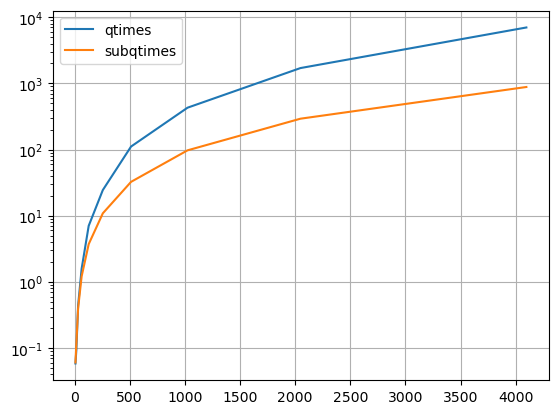

In [10]:
def compare_multiply():
    results = []
    qtimes = []
    subqtimes = []

    #huge runtime - 15 complexities
    #bit_sizes = [8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072]
    
    #quick runtime - 8 complexities 
    bit_sizes = [8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]

    #test based on bit length with random numbers
    for bits in bit_sizes:
        #generate random numbers based on bit length
        #https://docs.python.org/3/library/random.html#:~:text=random.getrandbits,arbitrarily%20large%20ranges.
        #i think there is something about the implementation that is not correct...
        qtime = time_multiply(BinaryNumber(random.getrandbits(bits)), BinaryNumber(random.getrandbits(bits)), quadratic_multiply)
        subqtime = time_multiply(BinaryNumber(random.getrandbits(bits)), BinaryNumber(random.getrandbits(bits)), subquadratic_multiply)

        qtimes.append(qtime)
        subqtimes.append(subqtime)
        results.append((bits, qtime, subqtime))

    avg_qtime = sum(qtimes)
    avg_subqtime = sum(subqtimes)

    if avg_subqtime < avg_qtime:
        print(f"sub q times are on average : {round((avg_subqtime / avg_qtime) * 100)}% faster")
    
    else:
        print(f"q times are on average : {round((avg_qtime / avg_subqtime) * 100)}% faster")

    print_results(results)

    fig, ax = plt.subplots()
    ax.plot(bit_sizes, qtimes, label="qtimes")
    ax.plot(bit_sizes, subqtimes, label="subqtimes")

    ax.legend()
    ax.grid(True)
    ax.set_yscale("log")

compare_multiply()